<a href="https://colab.research.google.com/github/teecha/GoogleColab/blob/main/gramschmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter the size of matrix N X N3
Enter a value : 3
Enter a value : 2
Enter a value : 5
Enter a value : 2
Enter a value : 4
Enter a value : 2
Enter a value : 6
Enter a value : 5
Enter a value : 4
user_matrix = 
[[3. 2. 5.]
 [2. 4. 2.]
 [6. 5. 4.]]

 time_taken for Q,R decomposition of 3,3 is 0.00017023086547851562


Q = 
[[ 0.42857143 -0.29614523  0.85359507]
 [ 0.28571429  0.9406966   0.18291323]
 [ 0.85714286 -0.16549292 -0.48776861]]

R = 
[[ 7.          6.28571429  6.14285714]
 [ 0.          2.34303135 -0.26130461]
 [ 0.          0.          2.68272735]]

A = user_matrix - Q*R
[[ 0.          1.16760673 -2.95354972]
 [ 2.          0.          0.53850239]
 [ 6.         -0.3877551   0.        ]]
user_matrix = 
[[0.62351087 0.05643057 0.20578543 0.4305898  0.19281364 0.92640319
  0.22541985 0.08568596 0.88728737 0.80914001]
 [0.37504702 0.22863596 0.66576283 0.48691632 0.93248698 0.1073003
  0.82333462 0.80897289 0.06381897 0.03387023]
 [0.54151514 0.05065406 0.0754128  0.84969773 0.2692

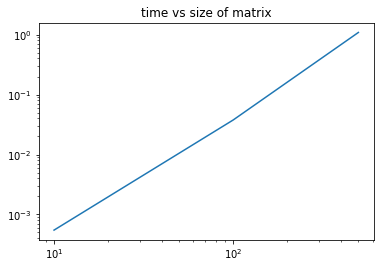

In [2]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def gramschmidt(user_matrix):
    R = np.zeros((user_matrix.shape[1], user_matrix.shape[1]))
    Q = np.zeros(user_matrix.shape)
    for i in range(0, user_matrix.shape[1]):
        R[i, i] = np.sqrt(np.dot(user_matrix[:, i], user_matrix[:, i]))
        Q[:, i] = user_matrix[:, i]/R[i, i]
        for j in range(i+1, user_matrix.shape[1]):
            R[i, j] = np.dot(Q[:, i], user_matrix[:, j])
            user_matrix[:, j] = user_matrix[:, j] - R[i, j]*Q[:, i]
    return Q, R

def ran():
  times = []
  iterations = [10,100,500]
  for i in iterations:
    coloumns = int(i)
    rows = coloumns
    user_matrix = []
    user_matrix = np.random.rand(rows, coloumns)
    print('user_matrix = ')
    print(user_matrix)
    start = time.time()
    Q, R = gramschmidt(user_matrix)
    stop = time.time()
    time_taken = stop - start
    times.append(time_taken)
    print("\n time_taken for Q,R decomposition of "+str(coloumns) +"," + str(rows) + " is " + str(time_taken) + "\n")
    print('\nQ = ')
    print(Q)
    print('\nR = ')
    print(R)
    print("\nA = user_matrix - Q*R")
    print( user_matrix - Q*R)
  plt.title("time vs size of matrix")
  plt.loglog(iterations,times)

def user():
  user_matrix = []
  coloumns = int(input("enter the size of matrix N X N"))
  rows = coloumns
  for i in range(0,coloumns):
    row_matrix = []
    for j in range(0,rows):
      row_matrix.append(float(input("Enter a value : ")))
    user_matrix.append(row_matrix)
  user_matrix = np.array(user_matrix)
  print('user_matrix = ')
  print(user_matrix)
  start = time.time()
  Q, R = gramschmidt(user_matrix)
  stop = time.time()
  time_taken = stop - start
  print("\n time_taken for Q,R decomposition of "+str(coloumns) +"," + str(rows) + " is " + str(time_taken) + "\n")
  print('\nQ = ')
  print(Q)
  print('\nR = ')
  print(R)
  print("\nA = user_matrix - Q*R")
  print( user_matrix - Q*R)

user()
ran()

user_matrix = 
[[0.76470621 0.01038613 0.58588219 0.11075736 0.49735043 0.82400931
  0.98469008 0.21286402 0.44771086 0.66662664]
 [0.73509379 0.1105374  0.04537638 0.47972151 0.84294106 0.75852029
  0.43697367 0.43277462 0.31165793 0.61127231]
 [0.05315997 0.74280597 0.21211485 0.88939718 0.28275572 0.92079615
  0.07898281 0.98429503 0.75626835 0.88007877]
 [0.00938223 0.35707762 0.32245394 0.11626119 0.12296567 0.78364834
  0.13543147 0.41372914 0.33918708 0.02654925]
 [0.25425017 0.02380454 0.54245203 0.9504233  0.22648212 0.67436247
  0.08701185 0.07986201 0.09920571 0.08477605]
 [0.29500733 0.41007258 0.86656404 0.82943828 0.97918856 0.75381264
  0.23180094 0.81007077 0.43040392 0.62171237]
 [0.11101496 0.91719112 0.71082584 0.79172381 0.99063341 0.81647124
  0.04597478 0.31178181 0.57756038 0.02282445]
 [0.94055989 0.1313217  0.34104646 0.80488404 0.64652889 0.39883676
  0.30672244 0.78465747 0.78086812 0.60352746]
 [0.82952027 0.89800802 0.17137569 0.66259852 0.77978574 0.003346

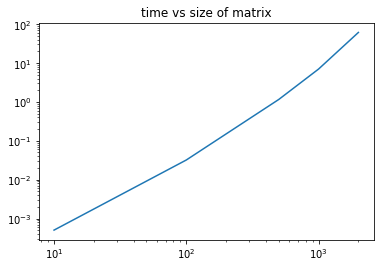

In [3]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def modifiedGramSchmidt(A):
    """
    Gives a orthonormal matrix, using modified Gram Schmidt Procedure
    :param A: a matrix of column vectors
    :return: a matrix of orthonormal column vectors
    """
    # assuming A is a square matrix
    dim = A.shape[0]
    Q = np.zeros(A.shape, dtype=A.dtype)
    for j in range(0, dim):
        q = A[:,j]
        for i in range(0, j):
            rij = np.vdot(q, Q[:,i])
            q = q - rij*Q[:,i]
        rjj = np.linalg.norm(q, ord=2)
        if np.isclose(rjj,0.0):
            raise ValueError("invalid input matrix")
        else:
            Q[:,j] = q/rjj
    return Q



def main():
    iterations = [10,100,500,1000,2000]
    times = []
    for i in iterations:
      coloumns = int(i)
      rows = coloumns
      user_matrix = []
      flag = 0
      #flag = int(input("enter \n 0 : auto-input \n 1 : userdefined input of matrix \n"))
      if flag == 0:
        user_matrix = np.random.rand(rows, coloumns)
      else:
        for i in range(0,coloumns):
          row_matrix = []
          for j in range(0,rows):
            row_matrix.append(float(input("Enter a value : ")))
          user_matrix.append(row_matrix)
        user_matrix = np.array(user_matrix)
      print('user_matrix = ')
      print(user_matrix)
      start = time.time()
      Q, R = gramschmidt(user_matrix)
      stop = time.time()
      time_taken = stop - start
      times.append(time_taken)
      print("\n time_taken for Q,R decomposition of "+str(coloumns) +"," + str(rows) + " is " + str(time_taken) + "\n")
      print('\nQ = ')
      print(Q)
      print('\nR = ')
      print(R)
      print("\nA = user_matrix - Q*R")
      print( user_matrix - Q*R)
    plt.title("time vs size of matrix")
    plt.loglog(iterations,times)
main()